In [1]:
import sys
sys.path.append('/mnt/antares_raid/home/oliver/nideep')
sys.path.append('/mnt/antares_raid/home/oliver/Scripts/autoencoder')
import numpy as np
import lmdb
import argparse
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from nideep.eval.learning_curve import LearningCurve
from nideep.eval.inference import infer_to_h5_fixed_dims, infer_to_lmdb
from nideep.eval.learning_curve import LearningCurve
from nideep.eval.eval_utils import Phase
%matplotlib inline
import matplotlib.font_manager as font_manager

In [ ]:
def init_plotting():
    import seaborn as sns
    sns.set(style='ticks', palette='Set2')
    sns.despine()
    #plt.rcParams['figure.figsize'] = (8, 3)
    plt.rcParams['font.size'] = 20
   # plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 1.5*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 15
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    #plt.rcParams['xtick.major.size'] = 3
    #plt.rcParams['xtick.minor.size'] = 3
    #plt.rcParams['xtick.major.width'] = 1
    #plt.rcParams['xtick.minor.width'] = 1
    #plt.rcParams['ytick.major.size'] = 3
    #plt.rcParams['ytick.minor.size'] = 3
    #plt.rcParams['ytick.major.width'] = 1
    #plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['patch.linewidth'] = 0.5

    #plt.rcParams['legend.loc'] = 'center left'
    plt.rcParams['axes.linewidth'] = 2

    #plt.gca().spines['right'].set_color('none')
    #plt.gca().spines['top'].set_color('none')
    #plt.gca().xaxis.set_ticks_position('bottom')
    #plt.gca().yaxis.set_ticks_position('left')
    
init_plotting()
path = '/mnt/antares_raid/home/oliver/roboto/Roboto-Light.ttf'
prop = font_manager.FontProperties(fname=path, size = 20)

## Group comparison

In [2]:
dates_list = ['2408', '2708', '2908','0309', '0609']
#dates_list = [ '2408', '2708']#'0609']
#dates_list = [ '0309', '0609']
#exps = ['AER', 'AEUR', 'RAND', 'AENR25', 'AENUR25', 'AENR50', 'AENUR50']
exps = ['AER', 'AEUR', 'RAND','AENR10', 'AENUR10', 'AENR25', 'AENUR25', 'AENR50', 'AENUR50']
#exps = ['AER','AENR10', 'AENUR10']

exp_data = dict()

for date in dates_list:
    exp_data.update({date:{'AER': {'log':'/mnt/antares_raid/home/oliver/Experiments/' + date + '/MLP/AER/log/log.log',
                                   'label': 'Rotated',
                                    'plot':['#fa8174', '-']},
        'AEUR': {'log':'/mnt/antares_raid/home/oliver/Experiments/' + date + '/MLP/AEUR/log/log.log',
                 'label': 'Unrotated',
                 'plot': ['c','--']},
        'RAND':{'log': '/mnt/antares_raid/home/oliver/Experiments/' + date + '/MLP/RAND/log/log.log',
                'label': 'Random',
                 'plot':['r', '-.'] },
        'AENR10':{'log':'/mnt/antares_raid/home/oliver/Experiments/' + date + '/MLP/AE10NR/log/log.log',
                  'label': 'Noisy 10 Rotated',
                 'plot':['m','-']},
        'AENUR10': {'log':'/mnt/antares_raid/home/oliver/Experiments/' + date + '/MLP/AE10NUR/log/log.log',
                    'label': 'Noisy 10 Unrotated',
                 'plot':['g','--']},
        'AENR25':{'log':'/mnt/antares_raid/home/oliver/Experiments/' + date + '/MLP/AE25NR/log/log.log',
                  'label': 'Noisy 25 Rotated',
                 'plot':['k','-']},
        'AENUR25': {'log':'/mnt/antares_raid/home/oliver/Experiments/' + date + '/MLP/AE25NUR/log/log.log',
                    'label': 'Noisy 25 Unrotated',
                 'plot':['b','--']},
        'AENR50':{'log':'/mnt/antares_raid/home/oliver/Experiments/' + date + '/MLP/AE50NR/log/log.log',
                  'label': 'Noisy 50 Rotated',
                 'plot':['y','-']},
        'AENUR50':{'log':'/mnt/antares_raid/home/oliver/Experiments/' + date + '/MLP/AE50NUR/log/log.log',
                   'label': 'Noisy 50 Unrotated',
                 'plot':['#8A2BE2','--']},
            }
        })
    
    for exp in exps:
        e = LearningCurve(exp_data[date][exp]['log'])
        e.parse()
        for phase in [Phase.TRAIN, Phase.TEST]:
            exp_data[date][exp][phase] = {}
            exp_data[date][exp][phase]['num_iter'] = e.list('NumIters', phase)
            exp_data[date][exp][phase]['loss'] = e.list('loss', phase)
            exp_data[date][exp][phase]['acc'] = e.list('accuracy', phase)
            
        

In [3]:
#Extract Test accuracy and Trains loss over groups
acc = [[] for e in exps]
loss = [[] for e in exps]

for d,_ in exp_data.items():
    for i,e in enumerate(exps):
        acc[i].append(exp_data[d][e][Phase.TEST]['acc'])
        loss[i].append(exp_data[d][e][Phase.TRAIN]['loss'])
        
    
    
    


In [ ]:
#exp_labels = ['Rotated', 'Unrotated', 'Random', '25 Rotated', '25 Unrotated', '50 Rotated' , '50 Unrotated']
#exp_labels = ['Rotated', 'Unrotated', 'Random', '10 Rotated', '10 Unrotated', '25 Rotated', '25 Unrotated', '50 Rotated' , '50 Unrotated']

#exps = ['AER','AENR10', 'AENUR10', 'AENR25', 'AENUR25', 'AENR50', 'AENUR50']
#exp_labels = ['Rotated', '10 Rotated', '10 Unrotated', '25 Rotated', '25 Unrotated', '50 Rotated', '50 Unrotated']


#exps = ['AER','AENUR10','AENR25', 'AENR50']




fig = plt.figure(figsize=(20,40))
xmax = 39000
ymin = 0.7
ymax = 0.96
fix_date = dates_list[0]
num_iter = exp_data[fix_date]['AER'][Phase.TEST]['num_iter']
for i,e in enumerate(exps):
    print(i,e)
    ax = plt.subplot(3,1,1)
    ma = np.mean(loss[i], axis = 0).squeeze()
    mstd = np.std(loss[i], axis = 0).squeeze()
    num_iter = exp_data[fix_date]['AER'][Phase.TRAIN]['num_iter']
    plt.plot(num_iter, ma, label='%s' % (exp_data[fix_date][e]['label'],), color=exp_data[fix_date][e]['plot'][0], linewidth=3)
    plt.fill_between(num_iter.squeeze(), ma-1*mstd, ma+1*mstd,  color=exp_data[fix_date][e]['plot'][0], alpha=0.2)
    plt.xlim(0,xmax)
    plt.xlabel('iteration', fontsize = 30,fontproperties=prop)
    # format x-axis ticks
    ticks, _ = plt.xticks()
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
    plt.ylabel('train loss', fontsize = 30,fontproperties=prop)
    plt.title("%s set loss" % (phase,), fontsize = 25,fontproperties=prop)
    plt.legend(loc='upper right',fontsize = 20, prop = prop)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(axis='both', direction='out')
    ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
    ax.get_yaxis().tick_left()
    plt.grid()

    
    ymin = 0.3
    ymax = 1.0
    ax = plt.subplot(3,1,2)
    num_iter = exp_data[fix_date]['AER'][Phase.TEST]['num_iter']
    ma = np.mean(acc[i], axis = 0).squeeze()
    mstd = np.std(acc[i], axis = 0).squeeze()
    plt.plot(num_iter, ma, label='%s' % (exp_data[fix_date][e]['label'],),  color=exp_data[fix_date][e]['plot'][0], linestyle = exp_data[fix_date][e]['plot'][1],linewidth=3)
    plt.fill_between(num_iter.squeeze(), ma-1*mstd, ma+1*mstd,  color=exp_data[fix_date][e]['plot'][0], alpha=0.2)
    plt.xlim(0,xmax)
    plt.ylim(ymin,ymax)
    plt.xlabel('iteration', fontsize = 30,fontproperties=prop)
    plt.ylabel('accuracy', fontsize = 30,fontproperties=prop)
    plt.title("%s set accuracy" % (phase,), fontsize = 25, fontproperties=prop)
    ticks, _ = plt.xticks()
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
    plt.legend(loc='lower right', prop = prop)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(axis='both', direction='out')
    ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
    ax.get_yaxis().tick_left()
    plt.grid()

    
    ymin = 0.935
    ymax = 0.955
    ax = plt.subplot(3,1,3)
    num_iter = exp_data[fix_date]['AER'][Phase.TEST]['num_iter']
    ma = np.mean(acc[i], axis = 0).squeeze()
    mstd = np.std(acc[i], axis = 0).squeeze()
    plt.plot(num_iter, ma, label='%s' % (exp_data[fix_date][e]['label'],), color=exp_data[fix_date][e]['plot'][0], linestyle = exp_data[fix_date][e]['plot'][1],linewidth=3)
    plt.fill_between(num_iter.squeeze(), ma-1*mstd, ma+1*mstd, color=exp_data[fix_date][e]['plot'][0], alpha=0.1)
    plt.xlim(0,xmax)
    plt.ylim(ymin,ymax)
    plt.xlabel('iteration', fontsize = 30,fontproperties=prop)
    plt.ylabel('accuracy', fontsize = 30,fontproperties=prop)
    plt.title("Zoom: %s set accuracy" % (phase,), fontsize = 25,fontproperties=prop)
    plt.legend(loc='lower right',fontsize = 20, prop = prop)
    ticks, _ = plt.xticks()
    plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.tick_params(axis='both', direction='out')
    ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
    ax.get_yaxis().tick_left()
    plt.grid()

plt.show()

In [ ]:
color = [ 'c', 'r', 'm','g', 'k','b', 'y', '#8A2BE2', '#fa8174']
fig = plt.figure(figsize=(20,40))
xmax = 39000
ymin = 0.7
ymax = 0.96
fix_date = '0609'
num_iter = exp_data[fix_date]['AER'][Phase.TEST]['num_iter']
for i,e in enumerate(exps):
    for j in range(len(dates_list)):

        plt.subplot(3,1,1)
        ma = np.mean(loss[i], axis = 0).squeeze()
        mstd = np.std(loss[i], axis = 0).squeeze()
        num_iter = exp_data[fix_date]['AER'][Phase.TRAIN]['num_iter']
        plt.plot(num_iter, loss[i][j], label='AE weights: %s' % (exp_data[fix_date][e]['label'],), color=color[i])
        #plt.fill_between(num_iter.squeeze(), ma-2*mstd, ma+2*mstd, color=color[i], alpha=0.2)
        plt.xlim(0,xmax)
        plt.xlabel('iteration')
        # format x-axis ticks
        ticks, _ = plt.xticks()
        plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
        plt.ylabel('train loss')
        plt.title("Loss on the %s set" % (phase,))


        ymin = 0.3
        ymax = 0.96
        plt.subplot(3,1,2)
        num_iter = exp_data[fix_date]['AER'][Phase.TEST]['num_iter']
        ma = np.mean(acc[i][j], axis = 0).squeeze()
        mstd = np.std(acc[i][j], axis = 0).squeeze()
        plt.plot(num_iter, acc[i][j], label='AE weights: %s' % (exp_data[fix_date][e]['label'],), color=color[i])
        #plt.fill_between(num_iter.squeeze(), ma-2*mstd, ma+2*mstd, color=color[i], alpha=0.2)
        plt.xlim(0,xmax)
        plt.ylim(ymin,ymax)
        plt.xlabel('iteration')
        plt.ylabel('accuracy')
        plt.title("Accuracy on the %s set" % (phase,))
        plt.legend(loc='lower right')
        plt.grid()


        ymin = 0.925
        ymax = 0.96
        plt.subplot(3,1,3)
        num_iter = exp_data[fix_date]['AER'][Phase.TEST]['num_iter']
        ma = np.mean(acc[i][j], axis = 0).squeeze()
        mstd = np.std(acc[i], axis = 0).squeeze()
        plt.plot(num_iter, acc[i][j], label='AE weights: %s' % (exp_data[fix_date][e]['label'],), color=color[i])
        #plt.fill_between(num_iter.squeeze(), ma-2*mstd, ma+2*mstd, color=color[i], alpha=0.2)
        plt.xlim(0,xmax)
        plt.ylim(ymin,ymax)
        plt.xlabel('iteration')
        plt.ylabel('accuracy')
        plt.title("Zoom: Accuracy on the %s set" % (phase,))
        plt.legend(loc='lower right')
        plt.grid()

plt.show()

## Hypothesis Testing

In [4]:
from scipy.stats import ttest_rel as ttest
acc_last = {e:[] for e in exps}


for d,_ in exp_data.items():
    for i,e in enumerate(exps):
        acc_last[e].append(exp_data[d][e][Phase.TEST]['acc'][-1])

# AENR10 vs AER
_, p_1 = ttest(acc_last['AENR10'],acc_last['AER'])
# AENR10 vs AENR25
_, p_2 = ttest(acc_last['AENR10'],acc_last['AENR25'])
# AER vs AER25
_, p_3 = ttest(acc_last['AER'],acc_last['AENR25'])

# AER vs AEUR
_, p_4 = ttest(acc_last['AER'],acc_last['AEUR'])

# AEUR vs AEUR10
_, p_5 = ttest(acc_last['AEUR'],acc_last['AENUR10'])

In [5]:
print(p_1, p_2, p_3, p_4)

(array([ 0.25414092]), array([ 0.1707423]), array([ 0.85132651]), array([  1.19828524e-07]))


In [6]:
print('Difference Rotated vs. Rotated + 10% Noise: {}%'.format((np.mean(acc_last['AENR10'])  - np.mean(acc_last['AER']))*100))

Difference Rotated vs. Rotated + 10% Noise: 0.084%


In [7]:
print( np.mean(acc_last['AER']), np.mean(acc_last['AENR10']), np.mean(acc_last['AENR25']))

(0.95269999999999988, 0.95353999999999994, 0.95255999999999985)


## Visualize Testing


8.0
2.0


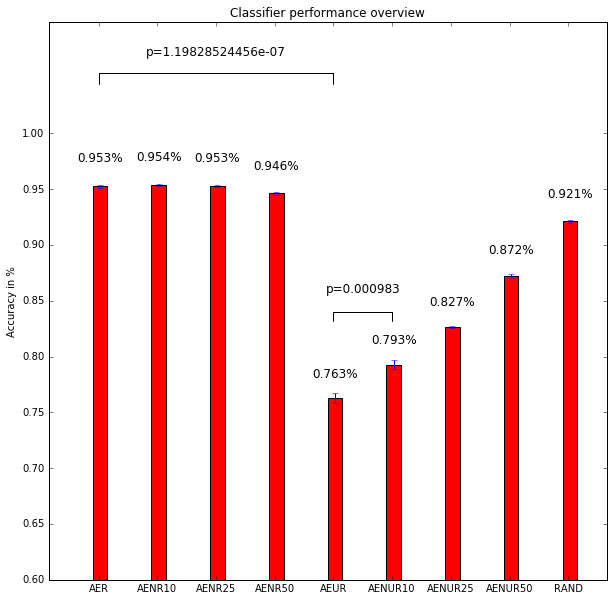

In [9]:
import matplotlib.pyplot as plt
import numpy as np
exps = ['AER','AENR10', 'AENR25', 'AENR50','AEUR','AENUR10','AENUR25','AENUR50','RAND']


N = len(exps)
means = [np.mean((acc_last[e])) for e in exps]
std = [np.std((acc_last[e])) for e in exps]
ind = np.arange(1,N*2+1,2)  # the x locations for the groups
width = 0.5      # the width of the bars
fig, ax = plt.subplots(figsize=(10,10))
ax.set_ylabel('Accuracy in %')
ax.set_title('Classifier performance overview')
ax.set_ylim([0.6,1.1])
ax.set_xlim([0.,N*2+1])
X = ind + width + 0.2
ax.set_xticks(X)
ax.set_yticks(np.arange(0.6,1.05,0.05))
ax.set_xticklabels(exps)

rects1 = ax.bar(ind + width, means, width, color='r', yerr=std)
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%0.3f%%' % height,
                ha='center', va='bottom', fontsize = 12)
        
autolabel(rects1)
def label_diff(i,j,text,X,Y, scaleytext,arm):
    x = (X[i]+X[j])/2
    y = 1.04*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])
    print(dx)

    props = {'connectionstyle':'bar','arrowstyle':'-',
                 'shrinkA':arm,'shrinkB':arm,'lw':1}
    ax.annotate(text, xy=(x,scaleytext*y), zorder=10, ha = 'center', size=12)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props, ha = 'center')
label_diff(0,4,'p={}'.format(float(p_4)),X, means, 1.08,60)
label_diff(4,5,'p={:6f}'.format(float(p_5)),X, means,1.04,8)

In [ ]:
import matplotlib.font_manager
matplotlib.font_manager.findfont('Roboto', fontext='ttf')

In [ ]:
print('A')